# BST281 Project RNA-seq

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42
rcParams['font.sans-serif'] = 'Arial'
import warnings
warnings.filterwarnings("ignore")
import urllib3
urllib3.disable_warnings()
import rpy2
import rpy2.robjects as robjects

Set/Get working directionary

In [2]:
current_path = os.getcwd()
print(current_path)

C:\Users\songdongyuan\group02_final_project_packet


In [4]:
from rpy2.robjects.packages import importr
# import R's "base" package
base = importr('base')

# import R's "utils" package
utils = importr('utils')

In [5]:
robjects.r('''
        # create a function `f`
        f <- function(r, verbose=FALSE) {
            if (verbose) {
                cat("I am calling f().\n")
            }
            2 * pi * r
        }
        # call the function `f` with argument value 3
        f(3)
        ''')

18.849556


In [6]:
robjects.r('''
print(2*pi)
''')

6.283185


In [7]:
%load_ext rpy2.ipython

In [8]:
%R require(ggplot2); require(tidyr); require(limma)

array([0], dtype=int32)

In [26]:
%%R

require(affy)
affy
print(rnorm(10))


Error in withVisible({ : object 'affy' not found


PermissionError: [WinError 32] 另一个程序正在使用此文件，进程无法访问。: 'C:\\Users\\SONGDO~1\\AppData\\Local\\Temp\\tmpjiqis2gw\\Rplots001.png'

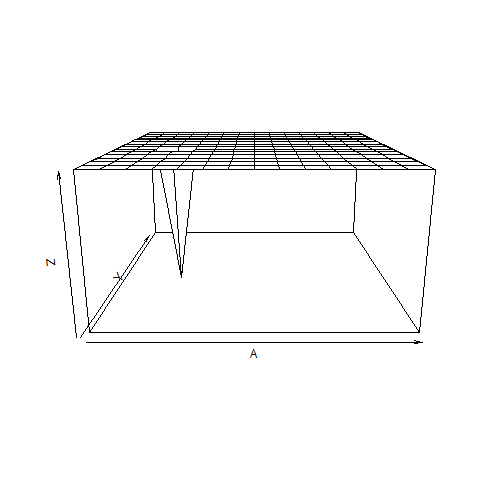

In [12]:
%%R

A <- matrix(1, 15, 15)
A[4,7] <- 0
persp(A, expand=0.5)

In [9]:
expr_df = pd.read_csv("expressionFile_counts_MM.csv")

In [10]:
expr_df = expr_df.set_index(expr_df.columns[0])
expr_df.head()

,..NM89_RPMI_salmon.quant.sf,..NM90_RPMI_HS5_salmon.quant.sf,..NM91_MM1S_salmon.quant.sf,..NM92_MM1S_HS5_salmon.quant.sf,..NM95_KMS11_salmon.quant.sf,..NM96_KMS11_HS5_salmon.quant.sf
Name,,,,,,
5_8S_rRNA,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
5S_rRNA,6.45945,21.44398,10.03000,10.11391,0.00000,1.01000
7SK,3.03000,3.26734,0.78000,0.00000,0.00000,2.78045
A1BG,980.97371,1196.18930,38.39037,79.96080,4.68050,20.19474
A1BG-AS1,944.94700,1099.25405,3.76547,21.01000,1.84924,2.56537


## Remove none and low expressed genes

In [11]:
print(expr_df.shape)

(58684, 6)


In [12]:
expr_df = expr_df.loc[expr_df.sum(axis=1) > 0, :]
print(expr_df.shape)

(43675, 6)


In [16]:
mask_low_vals = (expr_df > 0).sum(axis=1) == 6
expr_df = expr_df.loc[mask_low_vals, :]
print(expr_df.shape)

(22375, 6)


In [17]:
type(expr_df)

pandas.core.frame.DataFrame

In [18]:
expr_df.to_csv('filtered.tsv',sep='\t')

## Normalization

Use R (DESeq2, edgeR and/or limma) to do it